## Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import SimpleRNN, Dense, Input, Dropout, LSTM, Conv1D,BatchNormalization, LeakyReLU, GlobalAveragePooling1D, Activation
from tensorflow.keras.layers import RepeatVector, TimeDistributed,LayerNormalization, Bidirectional, Conv1D, ReLU, PReLU
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scikeras.wrappers import KerasRegressor,KerasClassifier
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

## Import Data

In [3]:
Train_Data = np.genfromtxt('Wafer_TRAIN.txt')
Test_Data = np.genfromtxt('Wafer_TEST.txt')

Train_DF = pd.DataFrame(Train_Data)
Test_DF = pd.DataFrame(Test_Data)

In [4]:
Train_DF

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,1.0,-1.602294,-1.670823,-1.693666,-1.699377,-1.699377,-1.703660,-1.703660,-1.703660,-1.703660,...,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432
1,1.0,1.084591,1.084591,1.084591,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,...,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308
2,1.0,0.362689,0.362689,0.362689,0.393316,0.362689,0.362689,0.362689,0.362689,0.362689,...,0.393316,0.393316,0.393316,0.362689,0.393316,0.393316,0.393316,0.393316,0.393316,0.393316
3,1.0,-1.094523,-1.094523,-1.094523,-1.096732,-1.094523,-1.096732,-1.094523,-1.094523,-1.094523,...,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732
4,1.0,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,...,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,-1.621709,-1.644240,-1.652689,-1.658322,-1.658322,-1.662546,-1.658322,-1.662546,-1.662546,...,-1.111952,-1.111952,-1.111952,-1.111952,-1.111952,-1.111952,-1.111952,-1.111952,-1.111952,-1.111952
996,1.0,0.813520,0.813520,0.813520,0.813520,0.813520,0.813520,0.813520,0.813520,0.813520,...,0.758193,0.758193,0.758193,0.758193,0.758193,0.758193,0.758193,0.758193,0.758193,0.758193
997,-1.0,-0.832885,-0.977293,-0.923421,-0.953684,-0.936716,-0.946148,-0.943889,-0.938630,-0.952115,...,-0.942169,-0.942518,-0.941143,-0.943985,-0.939208,-0.946774,-0.934842,-0.953684,-0.923421,-0.977293
998,1.0,0.930389,0.930389,0.930389,0.930389,0.930389,0.930389,0.930389,0.930389,0.865309,...,0.930389,0.930389,0.930389,0.930389,0.930389,0.930389,0.930389,0.930389,0.930389,0.930389


In [5]:
Test_DF

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,1.0,-1.079707,-1.083256,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,...,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707
1,1.0,-1.080197,-1.078021,-1.078021,-1.078021,-1.078021,-1.078021,-1.080197,-1.078021,-1.078021,...,-1.110670,-1.112846,-1.115023,-1.117199,-1.119376,-1.121553,-1.123729,-1.125906,-1.128082,-1.130259
2,1.0,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,...,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060
3,1.0,-1.658965,-1.696605,-1.705291,-1.711082,-1.711082,-1.715425,-1.715425,-1.715425,-1.715425,...,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382
4,1.0,-1.201221,-1.199042,-1.199042,-1.201221,-1.199042,-1.199042,-1.199042,-1.199042,-1.199042,...,-1.185968,-1.183789,-1.181610,-1.179431,-1.177251,-1.175072,-1.172893,-1.170714,-1.168535,-1.166356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6159,1.0,1.058364,1.058364,1.077259,1.058364,1.077259,1.077259,1.058364,1.058364,1.077259,...,1.058364,1.058364,1.058364,1.058364,1.058364,1.058364,1.058364,1.058364,1.058364,1.058364
6160,-1.0,-0.883897,-1.037149,-0.979977,-1.012094,-0.992098,-1.004760,-1.000370,-0.996084,-1.011200,...,-0.999874,-1.000244,-0.998784,-1.001801,-0.996731,-1.004760,-0.992098,-1.012094,-0.979977,-1.037149
6161,-1.0,0.700052,0.874868,0.836440,0.798761,0.786091,0.856247,0.849871,0.772646,0.900171,...,0.780763,0.781052,0.779912,0.782268,0.778308,0.784578,0.774691,0.790305,0.765226,0.809869
6162,1.0,-1.517047,-1.580021,-1.602920,-1.608645,-1.608645,-1.608645,-1.608645,-1.608645,-1.608645,...,-1.059059,-1.059059,-1.059059,-1.059059,-1.059059,-1.059059,-1.059059,-1.059059,-1.059059,-1.059059


In [6]:
print('Number of timestep for each training sample :' , Train_DF.shape[1]-1)
print('Number of timestep for each test sample :' , Test_DF.shape[1]-1)

print('Number of training samples :' , Train_DF.shape[0])
print('Number of test samples :' , Test_DF.shape[0])

Number of timestep for each training sample : 152
Number of timestep for each test sample : 152
Number of training samples : 1000
Number of test samples : 6164


In [7]:
print('Class Labels:',Train_DF[0].unique())

Class Labels: [ 1. -1.]


In [8]:
x_train = Train_DF.drop(0, axis=1)
x_test = Test_DF.drop(0, axis=1)

# 1:Abnormal 0:Normal
y_train = Train_DF[0].map({-1:1,1:0})
y_test = Test_DF[0].map({-1:1,1:0})

In [9]:
x_train.head(3)

,1,2,3,4,5,6,7,8,9,10,...,143,144,145,146,147,148,149,150,151,152
0,-1.602294,-1.670823,-1.693666,-1.699377,-1.699377,-1.703660,-1.703660,-1.703660,-1.703660,-1.703660,...,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432
1,1.084591,1.084591,1.084591,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.084591,...,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308
2,0.362689,0.362689,0.362689,0.393316,0.362689,0.362689,0.362689,0.362689,0.362689,0.362689,...,0.393316,0.393316,0.393316,0.362689,0.393316,0.393316,0.393316,0.393316,0.393316,0.393316


In [10]:
x_test.head(3)

,1,2,3,4,5,6,7,8,9,10,...,143,144,145,146,147,148,149,150,151,152
0,-1.079707,-1.083256,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,...,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707
1,-1.080197,-1.078021,-1.078021,-1.078021,-1.078021,-1.078021,-1.080197,-1.078021,-1.078021,-1.080197,...,-1.110670,-1.112846,-1.115023,-1.117199,-1.119376,-1.121553,-1.123729,-1.125906,-1.128082,-1.130259
2,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,...,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060


In [11]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    1
998    0
999    0
Name: 0, Length: 1000, dtype: int64

In [12]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
6159    0
6160    1
6161    1
6162    0
6163    0
Name: 0, Length: 6164, dtype: int64

## Handling Missing Values

In [13]:
print('Number of feature with Nan valus in Training Data:',sum(Train_DF.isnull().sum() > 0))
print('Number of feature with Nan valus in Test Data:',sum(Test_DF.isnull().sum() > 0))

Number of feature with Nan valus in Training Data: 0
Number of feature with Nan valus in Test Data: 0


In [14]:
# Check for Duplicated Data
print('Number of duplicated data in Training Data:',sum(Train_DF.isnull().sum() > 0))
print('Number of duplicated data in Test Data:',sum(Test_DF.isnull().sum() > 0))

Number of duplicated data in Training Data: 0
Number of duplicated data in Test Data: 0


## Visualization

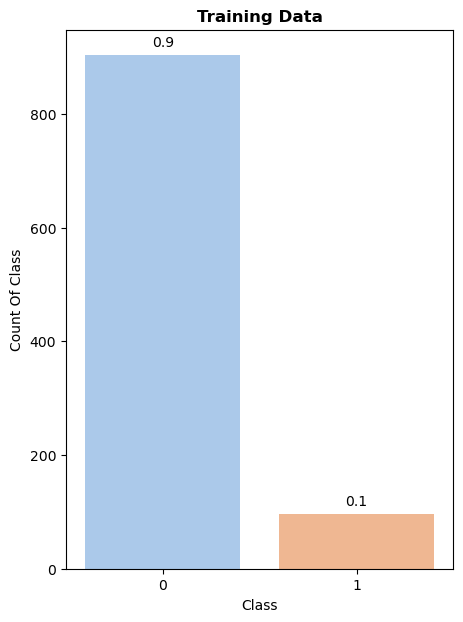

In [15]:
plt.figure(figsize=(5,7))
ax = sns.countplot(x=y_train, hue=y_train, legend=False, palette='pastel')

for p in ax.patches:
    ax.annotate(f'{np.round(p.get_height()/y_train.shape[0], decimals=2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Training Data' , fontsize=12, weight='bold')
plt.xlabel('Class', fontsize=10)
plt.ylabel('Count Of Class', fontsize=10)
plt.show()

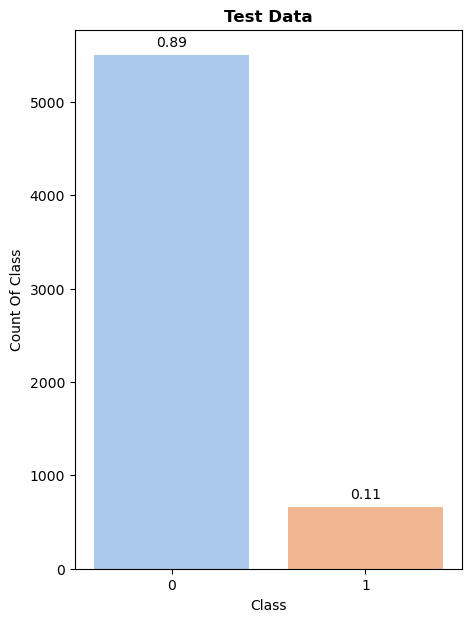

In [16]:
plt.figure(figsize=(5,7))
ax = sns.countplot(x=y_test, hue=y_test, legend=False, palette='pastel')

for p in ax.patches:
    ax.annotate(f'{np.round(p.get_height()/y_test.shape[0], decimals=2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Test Data' , fontsize=12, weight='bold')
plt.xlabel('Class', fontsize=10)
plt.ylabel('Count Of Class', fontsize=10)
plt.show()

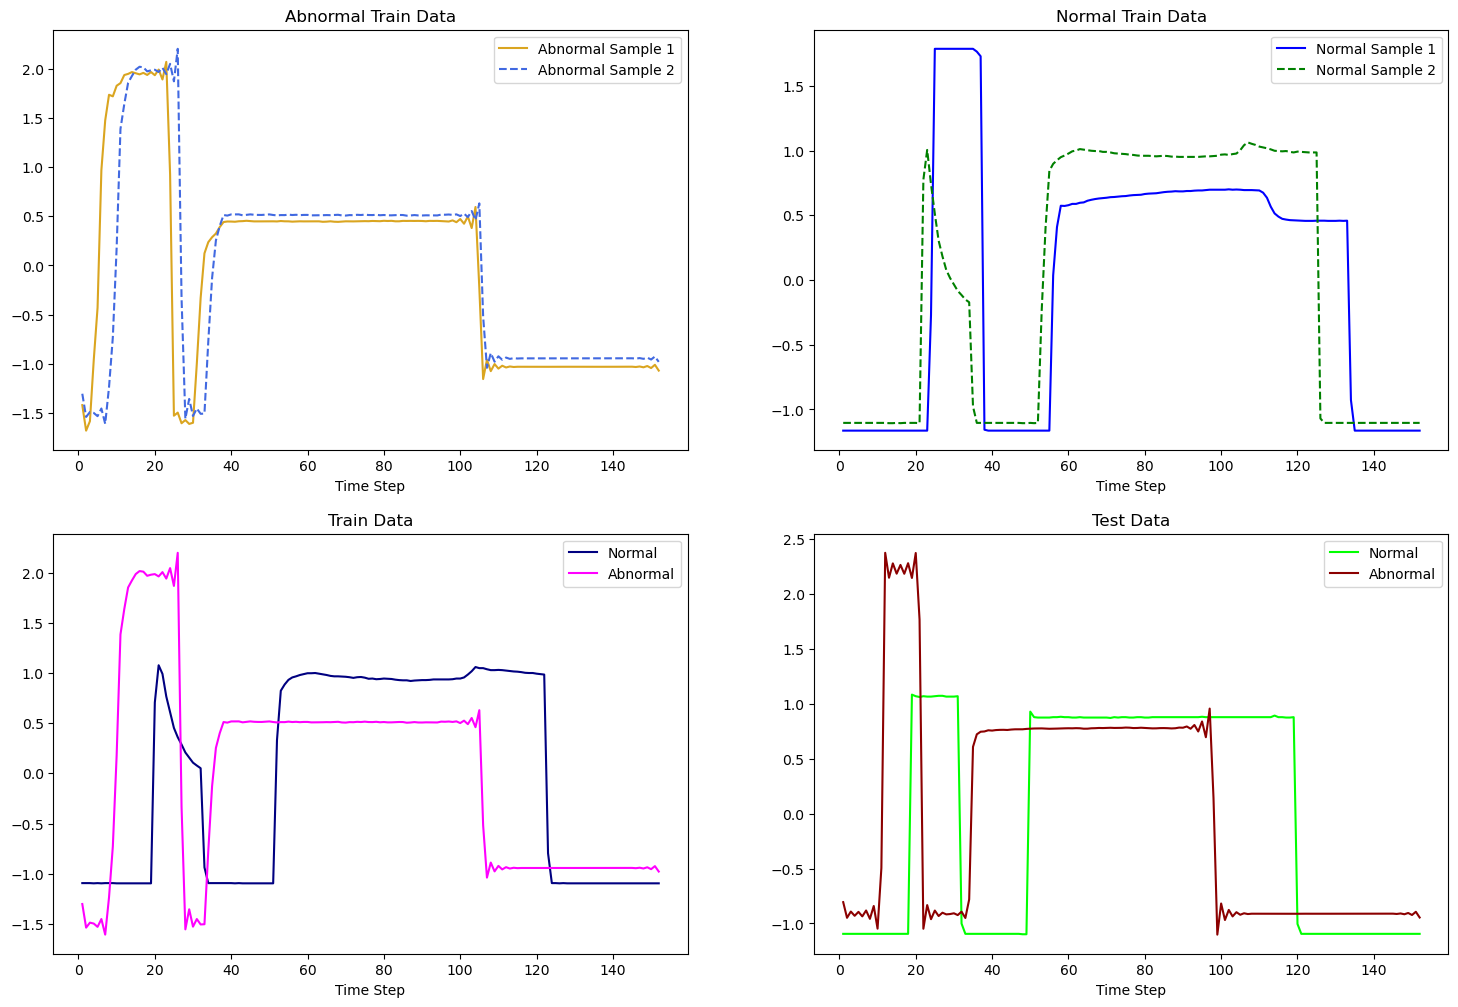

In [17]:
Train_abnormal = x_train[y_train == 1]
Train_normal = x_train[y_train == 0]
Test_abnormal = x_test[y_test == 1]
Test_normal = x_test[y_test == 0]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

axes[0,0].plot(Train_abnormal.loc[9], color='goldenrod')
axes[0,0].plot(Train_abnormal.loc[81], color='royalblue' , linestyle='--')
axes[0,0].set_title('Abnormal Train Data')
axes[0,0].set_xlabel('Time Step')
axes[0,0].legend(['Abnormal Sample 1', 'Abnormal Sample 2'])

axes[0,1].plot(Train_normal.loc[12], color='blue')
axes[0,1].plot(Train_normal.loc[4], color='green' , linestyle='--')
axes[0,1].set_title('Normal Train Data')
axes[0,1].set_xlabel('Time Step')
axes[0,1].legend(['Normal Sample 1', 'Normal Sample 2'])

axes[1,0].plot(Train_normal.loc[3], color='navy')
axes[1,0].plot(Train_abnormal.loc[81], color='magenta')
axes[1,0].set_title('Train Data')
axes[1,0].set_xlabel('Time Step')
axes[1,0].legend(['Normal', 'Abnormal'])

axes[1,1].plot(Test_normal.loc[8], color='lime')
axes[1,1].plot(Test_abnormal.loc[88], color='darkred')
axes[1,1].set_title('Test Data')
axes[1,1].set_xlabel('Time Step')
axes[1,1].legend(['Normal', 'Abnormal'])
plt.show()

In [18]:
print('Mean Of Data: ',np.mean(x_train.values.reshape(-1,1)))
print('Std Of Data: ',np.std(x_train.values.reshape(-1,1)))

Mean Of Data:  -1.0593101979220651e-10
Std Of Data:  0.9967050981341318


In [19]:
# Standardize
#MiMa_Normalize = MinMaxScaler()
#Num_Feature = 1
#x_train_reshape_ = x_train.values.reshape(-1,Num_Feature)
#x_test_reshape_ = x_test.values.reshape(-1,Num_Feature)

#MiMa_Normalize.fit(x_train_reshape_)
#x_train_reshape_Nor = MiMa_Normalize.transform(x_train_reshape_)
#x_test_reshape_Nor = MiMa_Normalize.transform(x_test_reshape_)

#x_train_Nor = pd.DataFrame(x_train_reshape_Nor.reshape(x_train.shape))
#x_test_Nor = pd.DataFrame(x_test_reshape_Nor.reshape(x_test.shape))


In [20]:
print('Number of train sample: %i'% len(x_train))
print('Number of train sample: %i'% len(x_test))

Number of train sample: 1000
Number of train sample: 6164


In [21]:
x_train_3D = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_3D = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

print('Train (Samples,Timesteps,features) : ', x_train_3D.shape)
print('Test (Samples,Timesteps,features) : ', x_test_3D.shape)

Train (Samples,Timesteps,features) :  (1000, 152, 1)
Test (Samples,Timesteps,features) :  (6164, 152, 1)


In [22]:
x_train_Normal_Class = x_train[y_train == 0]
x_train_3D_Normals_Class = x_train_3D[y_train == 0]

In [23]:
print('Number of Normal Class Samples(2D) : ', x_train_Normal_Class.shape[0])
print('Number of Normal Class Samples(3D) : ', x_train_3D_Normals_Class.shape[0])

Number of Normal Class Samples(2D) :  903
Number of Normal Class Samples(3D) :  903


#### MLP

In [ ]:
# Create AutoEncoder End To End

def create_AE (e_unit_1,e_unit_2,e_unit_3,kernel_L2_En,kernel_L2_De,drop_rate_en,drop_rate_de,lr_adam):
    
    # Input Layer
    input_layer = Input(shape=(x_train.shape[1],), name='Input')
    
    # Encoder layers
    encoded = Dense(e_unit_1, name='Encoder_1', use_bias=False, kernel_regularizer=regularizers.l2(kernel_L2_En), activation=None)(input_layer)
    encoded = BatchNormalization()(encoded)
    encoded = LeakyReLU()(encoded)
    encoded = Dropout(drop_rate_en)(encoded)

    encoded = Dense(e_unit_2, name='Encoder_2', use_bias=False, kernel_regularizer=regularizers.l2(kernel_L2_En), activation=None)(encoded)
    encoded = BatchNormalization()(encoded)
    encoded = LeakyReLU()(encoded)
    encoded = Dropout(drop_rate_en)(encoded)

    # Bottleneck
    bottleneck = Dense(e_unit_3, activation=None, name='Bottleneck')(encoded)
    bottleneck = LeakyReLU()(bottleneck)
    
    # Decoder layers
    decoded = Dense(e_unit_2, name='Decoder_2', use_bias=False, kernel_regularizer=regularizers.l2(kernel_L2_De), activation=None)(bottleneck)
    decoded = BatchNormalization()(decoded)
    decoded = LeakyReLU()(decoded)
    decoded = Dropout(drop_rate_de)(decoded)

    decoded = Dense(e_unit_1, name='Decoder_1', use_bias=False, kernel_regularizer=regularizers.l2(kernel_L2_De), activation=None)(decoded)
    decoded = BatchNormalization()(decoded)
    decoded = LeakyReLU()(decoded)
    decoded = Dropout(drop_rate_de)(decoded)

    output = Dense(x_train.shape[1], activation='linear', name='Decoder_Output')(decoded) 
    
    # Full autoencoder model
    deep_autoencoder = Model(input_layer, output)
    deep_autoencoder.compile(optimizer=Adam(learning_rate=lr_adam), loss='mean_squared_error')
    return deep_autoencoder

model_AE = KerasRegressor(model=create_AE, verbose=0, random_state=40)

param_grid_AE = {
    'model__e_unit_1': [160],
    'model__e_unit_2': [80],
    'model__e_unit_3': [64],
    'model__kernel_L2_En':[1e-6],
    'model__kernel_L2_De':[1e-6],
    'model__drop_rate_en': [0.1],
    'model__drop_rate_de': [0],
    'model__lr_adam':[1e-3],
    'batch_size': [64],
    'epochs': [350] 
}

time_series_splitter = TimeSeriesSplit(n_splits=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00025)
AE_Optimized = GridSearchCV(model_AE, param_grid_AE, cv=time_series_splitter, verbose=3, scoring='neg_mean_squared_error', return_train_score=True)
AE_Optimized.fit(x_train_Normal_Class,x_train_Normal_Class, callbacks=[reduce_lr])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END batch_size=64, epochs=350, model__drop_rate_de=0, model__drop_rate_en=0.1, model__e_unit_1=160, model__e_unit_2=80, model__e_unit_3=64, model__kernel_L2_De=1e-06, model__kernel_L2_En=1e-06, model__lr_adam=0.001;, score=(train=-0.024, test=-0.071) total time=  13.4s
[CV 2/5] END batch_size=64, epochs=350, model__drop_rate_de=0, model__drop_rate_en=0.1, model__e_unit_1=160, model__e_unit_2=80, model__e_unit_3=64, model__kernel_L2_De=1e-06, model__kernel_L2_En=1e-06, model__lr_adam=0.001;, score=(train=-0.016, test=-0.041) total time=  14.3s
[CV 3/5] END batch_size=64, epochs=350, model__drop_rate_de=0, model__drop_rate_en=0.1, model__e_unit_1=160, model__e_unit_2=80, model__e_unit_3=64, model__kernel_L2_De=1e-06, model__kernel_L2_En=1e-06, model__lr_adam=0.001;, score=(train=-0.018, test=-0.040) total time=  18.1s
[CV 4/5] END batch_size=64, epochs=350, model__drop_rate_de=0, model__drop_rate_en=0.1, model__e_unit_1=

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=KerasRegressor(model=<function create_AE at 0x000001A6D4B47380>, random_state=40, verbose=0),
             param_grid={'batch_size': [64], 'epochs': [350],
                         'model__drop_rate_de': [0],
                         'model__drop_rate_en': [0.1], 'model__e_unit_1': [160],
                         'model__e_unit_2': [80], 'model__e_unit_3': [64],
                         'model__kernel_L2_De': [1e-06],
                         'model__kernel_L2_En': [1e-06],
                         'model__lr_adam': [0.001]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [25]:
AE_NN_results = pd.DataFrame(AE_Optimized.cv_results_)
Best_Val_Score_AE_NN = AE_Optimized.best_score_
print(Best_Val_Score_AE_NN)
Best_Params_AE_NN = AE_Optimized.best_params_
print(Best_Params_AE_NN)

-0.04110626904366314
{'batch_size': 64, 'epochs': 350, 'model__drop_rate_de': 0, 'model__drop_rate_en': 0.1, 'model__e_unit_1': 160, 'model__e_unit_2': 80, 'model__e_unit_3': 64, 'model__kernel_L2_De': 1e-06, 'model__kernel_L2_En': 1e-06, 'model__lr_adam': 0.001}


In [26]:
Mean_Score_AE_NN = AE_NN_results.mean_test_score
Std_Score_AE_NN = AE_NN_results.std_test_score
print(f' Loss Mean: {Mean_Score_AE_NN[0]}\n Loss Std: {Std_Score_AE_NN[0]}')

 Loss Mean: -0.04110626904366314
 Loss Std: 0.01652589484218878


F1 Score Test:  0.7959305804907241
accuracy Test:  0.9446787800129786


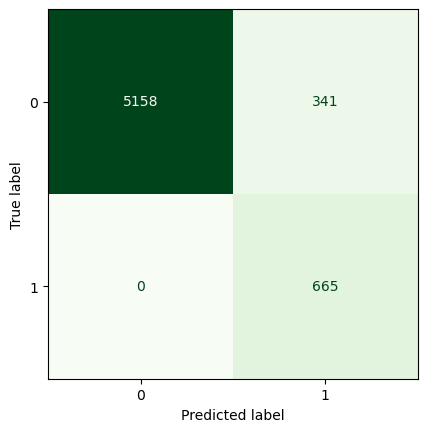

In [28]:
Best_Estimator_AE_NN = AE_Optimized.best_estimator_

reconstructions = Best_Estimator_AE_NN.predict(x_test)

reconstruction_errors = np.mean(np.square(x_test.values - reconstructions), axis=1)
errors_series = pd.Series(reconstruction_errors, index=x_test.index)

threshold = abs(Mean_Score_AE_NN[0]) + Std_Score_AE_NN[0]

is_anomaly = reconstruction_errors > threshold

y_test_predict = pd.Series(is_anomaly.astype(int), index=x_test.index)

normal_points = errors_series[~is_anomaly]
anomalies = errors_series[is_anomaly]

print('F1 Score Test: ', f1_score(y_test,y_test_predict))
print('accuracy Test: ', accuracy_score(y_test,y_test_predict))

display_CM = ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_predict))
display_CM.plot(cmap=plt.cm.Greens, colorbar=False)
plt.show()

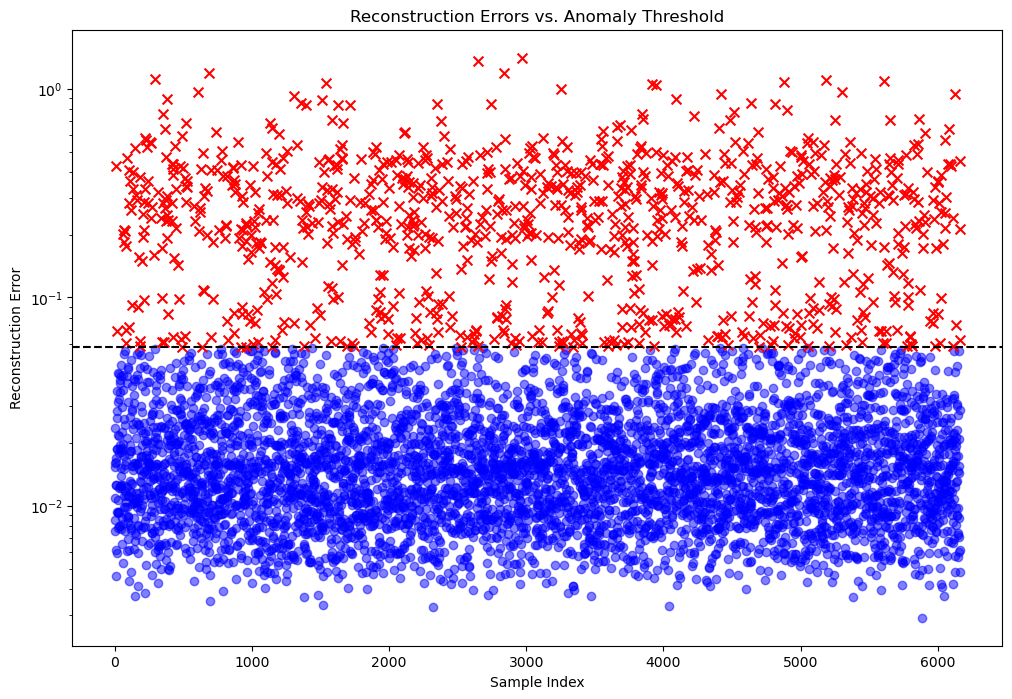

In [29]:
plt.figure(figsize=(12,8))

plt.scatter(normal_points.index, normal_points.values, color='blue', alpha=0.5, label='Normal')
plt.scatter(anomalies.index, anomalies.values, color='red', marker='x', s=50, label='Anomaly')
plt.axhline(y=threshold, color='k', linestyle='--', label='Anomaly Threshold')

plt.yscale('log')
plt.title('Reconstruction Errors vs. Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.show()

In [ ]:
Best_Estimator_AE_NN_Model = AE_Optimized.best_estimator_.model_
bottleneck_layer_AE_NN = Best_Estimator_AE_NN_Model.get_layer('Bottleneck')
Final_Encoder_AE_NN = Model(inputs=Best_Estimator_AE_NN_Model.input, outputs=bottleneck_layer_AE_NN.output)
print(Final_Encoder_AE_NN.summary())

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 152)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_1 (Dense)               │ (None, 160)            │        24,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 160)            │           640 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_25 (LeakyReLU)      │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_2 (Dense)               │ (None, 80)             │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 80)             │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bottleneck (Dense)              │ (None, 64)             │         5,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,264 (169.00 KB)

 Trainable params: 42,784 (167.12 KB)

 Non-trainable params: 480 (1.88 KB)

None


### LSTM

In [ ]:
# Create AutoEncoder End To End

def create_LSTM_AE (Con1D_unit_1,kernelsize,lstm_unit_1,lstm_unit_2,drop_rate_en,drop_rate_de,lr_adam,kernel_L2_En,kernel_L2_De):
    
    # Input Layer
    input_layer = Input(shape=(x_train_3D_Normals_Class.shape[1],x_train_3D_Normals_Class.shape[2]), name='Input')
    
    # Encoder layers
    encoded = Conv1D(filters=Con1D_unit_1, kernel_size=kernelsize, padding='same', name='Encoder_1')(input_layer)
    ##encoded = BatchNormalization()(encoded)
    encoded = ReLU()(encoded)

    encoded = Bidirectional(LSTM(lstm_unit_1, return_sequences=True, kernel_regularizer=regularizers.l2(kernel_L2_En), recurrent_dropout=drop_rate_en), name='Encoder_2')(encoded)
    ##encoded = LayerNormalization()(encoded)
    ##encoded = Dropout(drop_rate_en)(encoded)

    bottleneck = Bidirectional(LSTM(lstm_unit_2), name='Bottleneck')(encoded)
    
    # Decoder layers
    decoded = RepeatVector(x_train_3D_Normals_Class.shape[1], name='Repeat_Vector')(bottleneck)
    
    decoded = Bidirectional(LSTM(lstm_unit_1, name='Decoder_2', return_sequences=True, kernel_regularizer=regularizers.l2(kernel_L2_De)))(decoded)
    ##decoded = LayerNormalization()(decoded)
    decoded = Dropout(drop_rate_de)(decoded)

    decoded = Conv1D(filters=Con1D_unit_1, kernel_size=kernelsize, padding='same', name='Decoder_1')(decoded)
    ##decoded = BatchNormalization()(decoded)
    decoded = ReLU()(decoded)

    output = TimeDistributed(Dense(x_train_3D_Normals_Class.shape[2], activation='linear', name='Decoder_Output'))(decoded) 
    
    # Full autoencoder model
    deep_autoencoder = Model(input_layer, output)
    deep_autoencoder.compile(optimizer=Adam(learning_rate=lr_adam), loss='mean_squared_error')
    return deep_autoencoder

param_grid_AE = {
    'model__Con1D_unit_1': [150],
    'model__lstm_unit_1': [128],
    'model__lstm_unit_2': [64],
    'model__kernel_L2_En':[1e-5],
    'model__kernel_L2_De':[0],
    'model__drop_rate_en': [0.1],
    'model__drop_rate_de': [0],
    'model__lr_adam':[0.002],
    'batch_size': [64],
    'model__kernelsize':[5],
    'epochs': [350] 
}

tf.random.set_seed(42)
time_series_splitter = TimeSeriesSplit(n_splits=5)
es = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=2e-4)

results = []
print('\nStarting Manual Grid Search with TimeSeriesSplitCV')

# Iterate through each hyperparameter combination
for e1 in param_grid_AE['model__Con1D_unit_1']:
    for e2 in param_grid_AE['model__lstm_unit_1']:
        for e3 in param_grid_AE['model__lstm_unit_2']:
            for k2_en in param_grid_AE['model__kernel_L2_En']:
                for k2_de in param_grid_AE['model__kernel_L2_De']:
                    for dr_en in param_grid_AE['model__drop_rate_en']:
                        for dr_de in param_grid_AE['model__drop_rate_de']:
                            for ke_si in param_grid_AE['model__kernelsize']:
                                for lr in param_grid_AE['model__lr_adam']:
                                    for batch in param_grid_AE['batch_size']:
                                        for epochs in param_grid_AE['epochs']:
                                            
                                            params = {
                                                'e1': e1, 'e2': e2, 'e3': e3,
                                                'kernel_L2_En': k2_en, 'kernel_L2_De': k2_de,
                                                'drop_rate_en': dr_en, 'drop_rate_de': dr_de, 'kernelsize':ke_si,
                                                'lr_adam': lr, 'batch': batch, 'epochs': epochs
                                            }

                                            fold_losses = []
                                            fold_num = 1
                                            
                                            print(f'\n---> Testing parameters: {params}')

                                            # Time series cross-validation
                                            for train_index, val_index in time_series_splitter.split(x_train_3D_Normals_Class):
                                                print(f'--- Fold {fold_num}/{time_series_splitter.n_splits} ---')
                                                
                                                x_train_fold = x_train_3D_Normals_Class[train_index]
                                                x_val_fold = x_train_3D_Normals_Class[val_index]
                                                
                                                # Create fresh model for this fold
                                                model = create_LSTM_AE(
                                                    Con1D_unit_1=e1,
                                                    lstm_unit_1=e2,
                                                    lstm_unit_2=e3,
                                                    drop_rate_en=dr_en,
                                                    drop_rate_de=dr_de,
                                                    lr_adam=lr,
                                                    kernel_L2_En=k2_en,
                                                    kernel_L2_De=k2_de,
                                                    kernelsize=ke_si
                                                )
                                                
                                                # Train the model
                                                model.fit(
                                                    x_train_fold, x_train_fold,
                                                    epochs=epochs,
                                                    batch_size=batch,
                                                    validation_data=(x_val_fold, x_val_fold),
                                                    verbose=1,
                                                    callbacks=[reduce_lr]
                                                )
                                                
                                                # Evaluate validation loss
                                                loss = model.evaluate(x_val_fold, x_val_fold, verbose=0)
                                                fold_losses.append(loss)
                                                print(f'Fold {fold_num} validation loss: {loss:.6f}')
                                                fold_num += 1
                                            
                                            # Average loss across folds
                                            avg_loss = np.mean(fold_losses)
                                            std_loss = np.std(fold_losses)
                                            results.append({'params': params,'std_loss': std_loss,'avg_loss': avg_loss})
                                            print(f'Average validation loss for {params}: {avg_loss:.6f}')

# Find the best parameters
best_result = min(results, key=lambda x: x['avg_loss'])
print('\n--- Grid Search Complete ---')
print(f'Best Parameters Found: {best_result['params']}')
print(f'Best Std Validation Loss (MSE): {best_result['std_loss']:.4f}')
print(f'Best Average Validation Loss (MSE): {best_result['avg_loss']:.4f}')



Starting Manual Grid Search with TimeSeriesSplitCV

---> Testing parameters: {'e1': 150, 'e2': 128, 'e3': 64, 'kernel_L2_En': 1e-05, 'kernel_L2_De': 0, 'drop_rate_en': 0.1, 'drop_rate_de': 0, 'kernelsize': 5, 'lr_adam': 0.002, 'batch': 64, 'epochs': 350}
--- Fold 1/5 ---
Epoch 1/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 63s 8s/step - loss: 1.0325 - val_loss: 0.9990 - learning_rate: 0.0020
Epoch 2/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - loss: 1.0092 - val_loss: 1.0219 - learning_rate: 0.0020
Epoch 3/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - loss: 1.0153 - val_loss: 0.9999 - learning_rate: 0.0020
Epoch 4/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - loss: 0.9948 - val_loss: 0.9811 - learning_rate: 0.0020
Epoch 5/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - loss: 0.9776 - val_loss: 1.0803 - learning_rate: 0.0020
Epoch 6/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - loss: 1.0569 - val_loss: 0.9801 - learning_rate: 0.0020
Epoch 7/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - loss: 0.9710 - val_loss: 1.0431 - 

In [45]:
Mean_Score_AE_Conv_LSTM = best_result['avg_loss']
Std_Score_AE_Conv_LSTM = np.std(fold_losses)
print(f' Loss Mean: {Mean_Score_AE_Conv_LSTM}\n Loss Std: {Std_Score_AE_Conv_LSTM}')

 Loss Mean: 0.049909226782619956
 Loss Std: 0.029755173087669833


F1 Score Test:  0.725
accuracy Test:  0.9500324464633355


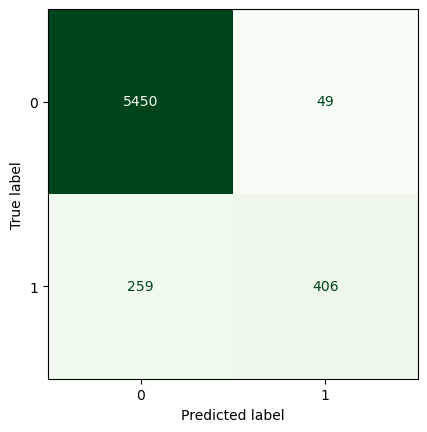

In [ ]:
reconstructions = model.predict(x_test_3D)
reconstruction_errors = np.mean(np.square(x_test_3D - reconstructions), axis=1)
errors_series = pd.Series(reconstruction_errors.reshape(-1,), index=x_test.index)

threshold = abs(Mean_Score_AE_Conv_LSTM) + Std_Score_AE_Conv_LSTM

is_anomaly = reconstruction_errors.reshape(-1,) > threshold

y_test_predict = pd.Series(is_anomaly.astype(int), index=x_test.index)

normal_points = errors_series[~is_anomaly]
anomalies = errors_series[is_anomaly]

print('F1 Score Test: ', f1_score(y_test,y_test_predict))
print('accuracy Test: ', accuracy_score(y_test,y_test_predict))

display_CM = ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_predict))
display_CM.plot(cmap=plt.cm.Greens, colorbar=False)
plt.show()

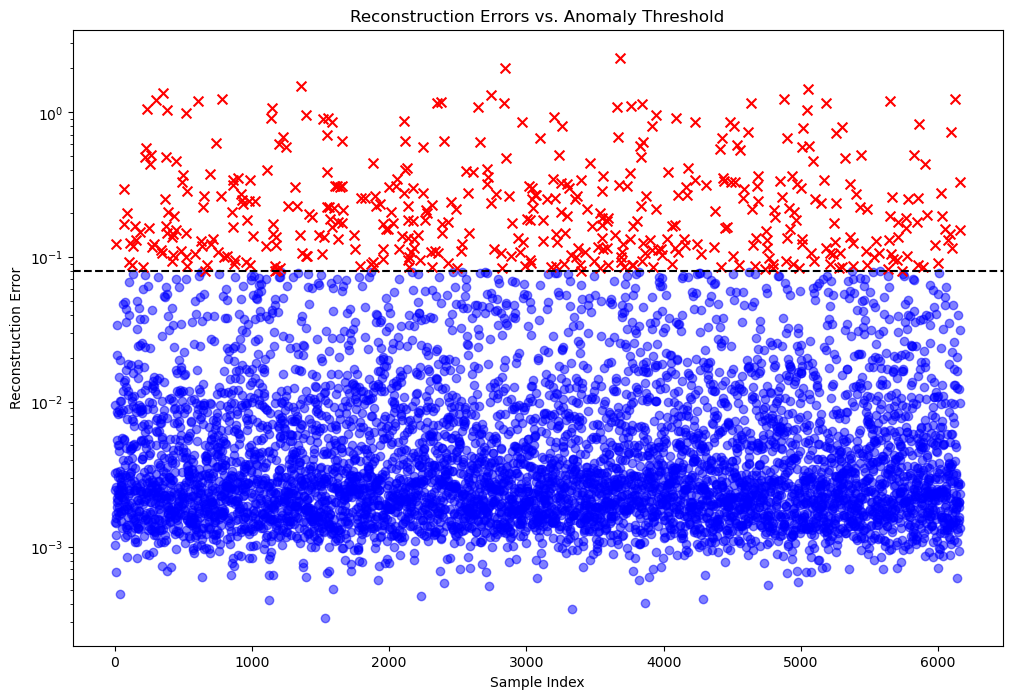

In [57]:
plt.figure(figsize=(12,8))

plt.scatter(normal_points.index, normal_points.values, color='blue', alpha=0.5, label='Normal')
plt.scatter(anomalies.index, anomalies.values, color='red', marker='x', s=50, label='Anomaly')
plt.axhline(y=threshold, color='k', linestyle='--', label='Anomaly Threshold')

plt.yscale('log')
plt.title('Reconstruction Errors vs. Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.show()

In [ ]:
bottleneck_layer_AE_Conv_LSTM = model.get_layer('Bottleneck')
Final_Encoder_AE_Conv_LSTM = Model(inputs=model.input, outputs=bottleneck_layer_AE_Conv_LSTM.output)
print('Encoder Model Summary:')
print(Final_Encoder_AE_Conv_LSTM.summary())